# Auto Encoder Training: 
Here I built an autoencoder that both reduces the dimensionality of the input data and compresses the range of embeddings between -1 and 1. Compressing the dimensionality and standardizing the inputs to be between a consistent range will make clustering with k-means easier and give equal weighting to each dimension.

In [1]:
import tensorflow_io as tfio

import datetime

import matplotlib.pyplot as plt
import h5py
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from performance_evaluation import plot_training_history, evaluate_model_performance

from tensorflow.python.client import device_lib

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(
    physical_devices[0], enable=True
)

In [3]:
all_customer_engagement = pd.read_pickle(
    'data/AE_Clustering/all_customer_engagement.pkl'
).drop('custno', axis=1)

In [4]:
Xs = all_customer_engagement.values

# Setup Model Architecture

In [6]:
all_cust_engagement = keras.Input(shape=(Xs.shape[1],), name='All_Customer_Engagement')
encoded = layers.Dense(120, activation='relu')(all_cust_engagement)
encoded = layers.Dense(60, activation='relu')(encoded)
encoded = layers.Dense(30, activation='tanh')(encoded)

decoded = layers.Dense(60, activation='relu')(encoded)
decoded = layers.Dense(120, activation='relu')(decoded)
decoded = layers.Dense(283, activation='linear')(decoded)

In [7]:
encoder = keras.Model(all_cust_engagement, encoded)

In [8]:
model = keras.Model(
    inputs=all_cust_engagement, 
    outputs=decoded, name="Basic_Auto_Encoder"
)

In [9]:
model.summary()

Model: "Basic_Auto_Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
All_Customer_Engagement (Inp [(None, 283)]             0         
_________________________________________________________________
dense (Dense)                (None, 120)               34080     
_________________________________________________________________
dense_1 (Dense)              (None, 60)                7260      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 60)                1860      
_________________________________________________________________
dense_4 (Dense)              (None, 120)               7320      
_________________________________________________________________
dense_5 (Dense)              (None, 283)        

In [10]:
adam_opt = keras.optimizers.Adam(
    learning_rate=0.00005,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)

In [11]:
model.compile(
    loss='mse',
    optimizer=adam_opt,
    metrics=[keras.metrics.MeanSquaredError()],
)

In [12]:
log_dir = "logs/AE/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [13]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [14]:
# Remove Existing Logs in TensorBoard
!rm -r /home/ben/gitrepos/shfly/logs/AE

In [15]:
history = model.fit(
    Xs,
    Xs, batch_size=5000, epochs=250, validation_split=0.2,
    callbacks=[tensorboard_callback]
)

Epoch 1/250
 1/11 [=>............................] - ETA: 0s - loss: 4.8000 - mean_squared_error: 4.8000WARNING:tensorflow:From /home/ben/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
11/11 [==============================] - 0s 21ms/step - loss: 5.8585 - mean_squared_error: 5.8585 - val_loss: 3.4259 - val_mean_squared_error: 3.4259
Epoch 2/250
11/11 [==============================] - 0s 9ms/step - loss: 5.8340 - mean_squared_error: 5.8340 - val_loss: 3.4114 - val_mean_squared_error: 3.4114
Epoch 3/250
11/11 [==============================] - 0s 9ms/step - loss: 5.8103 - mean_squared_error: 5.8103 - val_loss: 3.3967 - val_mean_squared_error: 3.3967
Epoch 4/250
11/11 [==============================] - 0s 9ms/step - loss: 5.7862 - mean_squared_error: 5.7862 - val_loss: 3.3818 - val_mea

11/11 [==============================] - 0s 10ms/step - loss: 2.0667 - mean_squared_error: 2.0667 - val_loss: 1.0545 - val_mean_squared_error: 1.0545
Epoch 99/250
11/11 [==============================] - 0s 10ms/step - loss: 2.0414 - mean_squared_error: 2.0414 - val_loss: 1.0400 - val_mean_squared_error: 1.0400
Epoch 100/250
11/11 [==============================] - 0s 9ms/step - loss: 2.0166 - mean_squared_error: 2.0166 - val_loss: 1.0266 - val_mean_squared_error: 1.0266
Epoch 101/250
11/11 [==============================] - 0s 9ms/step - loss: 1.9922 - mean_squared_error: 1.9922 - val_loss: 1.0116 - val_mean_squared_error: 1.0116
Epoch 102/250
11/11 [==============================] - 0s 10ms/step - loss: 1.9680 - mean_squared_error: 1.9680 - val_loss: 0.9976 - val_mean_squared_error: 0.9976
Epoch 103/250
11/11 [==============================] - 0s 9ms/step - loss: 1.9442 - mean_squared_error: 1.9442 - val_loss: 0.9834 - val_mean_squared_error: 0.9834
Epoch 104/250
11/11 [=============

11/11 [==============================] - 0s 10ms/step - loss: 0.7634 - mean_squared_error: 0.7634 - val_loss: 0.3440 - val_mean_squared_error: 0.3440
Epoch 199/250
11/11 [==============================] - 0s 10ms/step - loss: 0.7589 - mean_squared_error: 0.7589 - val_loss: 0.3438 - val_mean_squared_error: 0.3438
Epoch 200/250
11/11 [==============================] - 0s 9ms/step - loss: 0.7531 - mean_squared_error: 0.7531 - val_loss: 0.3406 - val_mean_squared_error: 0.3406
Epoch 201/250
11/11 [==============================] - 0s 10ms/step - loss: 0.7491 - mean_squared_error: 0.7491 - val_loss: 0.3385 - val_mean_squared_error: 0.3385
Epoch 202/250
11/11 [==============================] - 0s 9ms/step - loss: 0.7424 - mean_squared_error: 0.7424 - val_loss: 0.3361 - val_mean_squared_error: 0.3361
Epoch 203/250
11/11 [==============================] - 0s 10ms/step - loss: 0.7374 - mean_squared_error: 0.7374 - val_loss: 0.3338 - val_mean_squared_error: 0.3338
Epoch 204/250
11/11 [===========

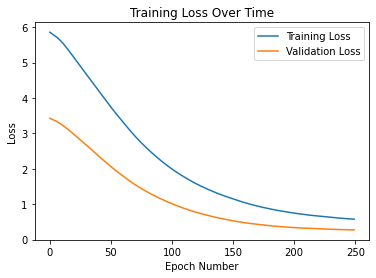

In [17]:
plot_training_history(history)


In [18]:
!ls data/AE_Clustering/

all_customer_engagement.pkl  encoder


In [19]:
encoded_Xs = encoder.predict(Xs)

In [21]:
pd.DataFrame(encoded_Xs).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,63901.000000,63901.000000,63901.000000,63901.000000,63901.000000,63901.000000,63901.000000,63901.000000,63901.000000,63901.000000,...,63901.000000,63901.000000,63901.000000,63901.000000,63901.000000,63901.000000,63901.000000,63901.000000,63901.000000,63901.000000
mean,0.138159,0.064628,-0.077943,0.255132,0.196226,0.024565,-0.226669,0.065302,-0.137121,-0.176708,...,0.100814,0.194526,0.163162,-0.196011,0.095884,-0.230394,0.350982,0.172994,0.117882,0.036691
std,0.241857,0.215367,0.216416,0.209165,0.221375,0.317046,0.276555,0.325870,0.281570,0.223803,...,0.218634,0.278527,0.209549,0.185014,0.361866,0.325953,0.254175,0.267631,0.193609,0.293436
min,-0.999999,-0.999872,-0.956004,-1.000000,-0.999997,-1.000000,-1.000000,-1.000000,-1.000000,-0.931186,...,-1.000000,-0.999723,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.905770,-1.000000,-1.000000
25%,0.045160,-0.034166,-0.216730,0.216925,0.080629,-0.157222,-0.326626,-0.183497,-0.271253,-0.313963,...,-0.045134,-0.002395,0.100419,-0.249922,-0.172591,-0.448944,0.221628,-0.044069,0.031957,-0.110863
50%,0.144643,0.074095,-0.126938,0.303446,0.223042,-0.057559,-0.213260,0.058531,-0.145694,-0.230593,...,0.130019,0.195090,0.193820,-0.161751,0.087708,-0.267251,0.385133,0.161995,0.117018,0.026096
75%,0.247992,0.164870,-0.002978,0.365640,0.325390,0.141791,-0.127317,0.346627,0.018450,-0.112469,...,0.272230,0.356115,0.285589,-0.088045,0.381608,-0.021683,0.497102,0.338882,0.202991,0.149351
max,1.000000,1.000000,1.000000,0.940320,0.999999,1.000000,1.000000,1.000000,0.999996,1.000000,...,0.712651,1.000000,0.933814,0.961642,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999


# Save Encoder

In [22]:
encoder.save('data/AE_Clustering/encoder.h5')